In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skincare-products-clean-dataset/skincare_products_clean.csv


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
df = pd.read_csv("/kaggle/input/skincare-products-clean-dataset/skincare_products_clean.csv")
df

product_name  \
0     The Ordinary Natural Moisturising Factors + HA...   
1         CeraVe Facial Moisturising Lotion SPF 25 52ml   
2     The Ordinary Hyaluronic Acid 2% + B5 Hydration...   
3             AMELIORATE Transforming Body Lotion 200ml   
4                        CeraVe Moisturising Cream 454g   
...                                                 ...   
1133  Elemis Life Elixirs Embrace Bath and Shower El...   
1134     Love Boo Splendidly Soothing Bath Soak (250ml)   
1135  Elemis Life Elixirs Fortitude Bath and Shower ...   
1136  Connock London Kukui Oil Soothing Bath & Showe...   
1137           Weleda Baby Calendula Cream Bath (200ml)   

                                            product_url product_type  \
0     https://www.lookfantastic.com/the-ordinary-nat...  Moisturiser   
1     https://www.lookfantastic.com/cerave-facial-mo...  Moisturiser   
2     https://www.lookfantastic.com/the-ordinary-hya...  Moisturiser   
3     https://www.lookfantastic.com/ameliorate-trans...  Moisturiser   
4     https://www.lookfantastic.com/cerave-moisturis...  Moisturiser   
...                                                 ...          ...   
1133  https://www.lookfantastic.com/elemis-life-elix...     Bath Oil   
1134  https://www.lookfantastic.com/love-boo-splendi...     Bath Oil   
1135  https://www.lookfantastic.com/elemis-life-elix...     Bath Oil   
1136  https://www.lookfantastic.com/connock-london-k...     Bath Oil   
1137  https://www.lookfantastic.com/weleda-baby-cale...     Bath Oil   

                                          clean_ingreds   price  
0     ['capric triglyceride', 'cetyl alcohol', 'prop...   £5.20  
1     ['homosalate', 'glycerin', 'octocrylene', 'eth...  £13.00  
2     ['sodium hyaluronate', 'sodium hyaluronate', '...   £6.20  
3     ['ammonium lactate', 'c12-15', 'glycerin', 'pr...  £22.50  
4     ['glycerin', 'cetearyl alcohol', 'capric trigl...  £16.00  
...                                                 ...     ...  
1133  ['prunus amygdalus dulcis', 'tipa-laureth sulf...  £55.00  
1134  ['sodium lauroyl', 'sodium cocoamphoacetate', ...  £10.99  
1135  ['prunus amygdalus dulcis', 'tipa-laureth sulf...  £55.00  
1136  ['capric triglyceride', 'peg-40 sorbitan perol...  £36.00  
1137  ['prunus amygdalus dulcis', 'sesamium indicum ...  £13.95  

[1138 rows x 5 columns]

In [10]:
print("Available columns:", df.columns.tolist())


Available columns: ['product_name', 'product_url', 'product_type', 'clean_ingreds', 'price']


In [11]:
df['combined_features'] = (
    df['product_type'].fillna('') + ' ' +
    df['clean_ingreds'].fillna('')
)
df

product_name  \
0     The Ordinary Natural Moisturising Factors + HA...   
1         CeraVe Facial Moisturising Lotion SPF 25 52ml   
2     The Ordinary Hyaluronic Acid 2% + B5 Hydration...   
3             AMELIORATE Transforming Body Lotion 200ml   
4                        CeraVe Moisturising Cream 454g   
...                                                 ...   
1133  Elemis Life Elixirs Embrace Bath and Shower El...   
1134     Love Boo Splendidly Soothing Bath Soak (250ml)   
1135  Elemis Life Elixirs Fortitude Bath and Shower ...   
1136  Connock London Kukui Oil Soothing Bath & Showe...   
1137           Weleda Baby Calendula Cream Bath (200ml)   

                                            product_url product_type  \
0     https://www.lookfantastic.com/the-ordinary-nat...  Moisturiser   
1     https://www.lookfantastic.com/cerave-facial-mo...  Moisturiser   
2     https://www.lookfantastic.com/the-ordinary-hya...  Moisturiser   
3     https://www.lookfantastic.com/ameliorate-trans...  Moisturiser   
4     https://www.lookfantastic.com/cerave-moisturis...  Moisturiser   
...                                                 ...          ...   
1133  https://www.lookfantastic.com/elemis-life-elix...     Bath Oil   
1134  https://www.lookfantastic.com/love-boo-splendi...     Bath Oil   
1135  https://www.lookfantastic.com/elemis-life-elix...     Bath Oil   
1136  https://www.lookfantastic.com/connock-london-k...     Bath Oil   
1137  https://www.lookfantastic.com/weleda-baby-cale...     Bath Oil   

                                          clean_ingreds   price  \
0     ['capric triglyceride', 'cetyl alcohol', 'prop...   £5.20   
1     ['homosalate', 'glycerin', 'octocrylene', 'eth...  £13.00   
2     ['sodium hyaluronate', 'sodium hyaluronate', '...   £6.20   
3     ['ammonium lactate', 'c12-15', 'glycerin', 'pr...  £22.50   
4     ['glycerin', 'cetearyl alcohol', 'capric trigl...  £16.00   
...                                                 ...     ...   
1133  ['prunus amygdalus dulcis', 'tipa-laureth sulf...  £55.00   
1134  ['sodium lauroyl', 'sodium cocoamphoacetate', ...  £10.99   
1135  ['prunus amygdalus dulcis', 'tipa-laureth sulf...  £55.00   
1136  ['capric triglyceride', 'peg-40 sorbitan perol...  £36.00   
1137  ['prunus amygdalus dulcis', 'sesamium indicum ...  £13.95   

                                      combined_features  
0     Moisturiser ['capric triglyceride', 'cetyl alc...  
1     Moisturiser ['homosalate', 'glycerin', 'octocr...  
2     Moisturiser ['sodium hyaluronate', 'sodium hya...  
3     Moisturiser ['ammonium lactate', 'c12-15', 'gl...  
4     Moisturiser ['glycerin', 'cetearyl alcohol', '...  
...                                                 ...  
1133  Bath Oil ['prunus amygdalus dulcis', 'tipa-lau...  
1134  Bath Oil ['sodium lauroyl', 'sodium cocoamphoa...  
1135  Bath Oil ['prunus amygdalus dulcis', 'tipa-lau...  
1136  Bath Oil ['capric triglyceride', 'peg-40 sorbi...  
1137  Bath Oil ['prunus amygdalus dulcis', 'sesamium...  

[1138 rows x 6 columns]

In [12]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['combined_features'])
X


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 49803 stored elements and shape (1138, 2437)>

In [13]:
def recommend_products(user_query, top_n=5):
    user_vec = vectorizer.transform([user_query])
    sim_scores = cosine_similarity(user_vec, X)
    top_indices = sim_scores[0].argsort()[-top_n:][::-1]
    return df.iloc[top_indices][['product_name', 'product_type', 'clean_ingreds', 'price']]


In [14]:
query = "moisturizer for dry skin with hyaluronic acid"
recommendations = recommend_products(query, top_n=5)



In [15]:
print("Top product recommendations for:", query)
print(recommendations.to_string(index=False))

Top product recommendations for: moisturizer for dry skin with hyaluronic acid
                                         product_name product_type                                                                                                                                                                                                                                                                                                                                                                                                                                                                              clean_ingreds  price
                            GLAMGLOW Supertoner 200ml        Toner ['alcohol denat', 'propanediol', 'mandelic acid', 'glycolic acid', 'salicylic acid', 'lactic acid', 'tartaric acid', 'pyruvic acid', 'charcoal powder', 'eucalyptus globulus', 'eucalyptus globulus', 'hamamelis virginiana', 'algae extract', 'salix alba extract', 'nylon 12', 'aloe barbadenis extract', 'ment

In [ ]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv("/kaggle/input/skincare-products-clean-dataset/skincare_products_clean.csv")

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Custom cleaner using spaCy (group together  + remove stopwords)
def clean_text(text):
    doc = nlp(text.lower())
    return " ".join([token.lemma_ for token in doc if token.is_alpha and not token.is_stop])

# Apply text cleaning
df['clean_ingreds_cleaned'] = df['clean_ingreds'].fillna('').apply(clean_text)
df['product_type_cleaned'] = df['product_type'].fillna('').apply(clean_text)

# Give weights to ingredients (more important) vs product type
df['combined_features'] = df['product_type_cleaned'] + ' ' + df['clean_ingreds_cleaned'] * 2

# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['combined_features'])

# Recommendation Function
def recommend_products_advanced(user_query, top_n=5):
    user_query_clean = clean_text(user_query)
    user_vec = vectorizer.transform([user_query_clean])
    sim_scores = cosine_similarity(user_vec, X)
    
    if sim_scores.max() < 0.1:
        print("⚠️ Warning: No strong matches found. Try using different keywords.")
    
    top_indices = sim_scores[0].argsort()[-top_n:][::-1]
    return df.iloc[top_indices][['product_name', 'product_type', 'clean_ingreds', 'price']]

# Test It
query = "hydrating night cream with ceramides and niacinamide for dry skin"
recommendations = recommend_products_advanced(query)
print("Recommendations for:", query)
print(recommendations.to_string(index=False))


In [ ]:
def severity_score(ingredients):
    severe_terms = ['acne', 'eczema', 'rosacea', 'melasma', 'psoriasis']
    count = sum([1 for word in severe_terms if word in ingredients])
    return count

In [ ]:
def recommend_products_advanced(
    user_query, 
    top_n=10, 
    sort_by='similarity',  # options: 'similarity', 'price', 'alphabetical', 'severity'
    max_price=None
):
    user_query_clean = clean_text(user_query)
    user_vec = vectorizer.transform([user_query_clean])
    sim_scores = cosine_similarity(user_vec, X).flatten()

    df['similarity_score'] = sim_scores
df

In [ ]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv("/kaggle/input/skincare-products-clean-dataset/skincare_products_clean.csv")
# Convert price to numeric, remove any non-numeric characters just in case
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = pd.read_csv("/kaggle/input/skincare-products-clean-dataset/skincare_products_clean.csv")
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Convert to numeric



# Load spaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Clean input text (group together + stopword removal)
def clean_text(text):
    doc = nlp(str(text).lower())
    return " ".join([token.lemma_ for token in doc if token.is_alpha and not token.is_stop])

# Preprocess relevant text columns
df['clean_ingreds_cleaned'] = df['clean_ingreds'].fillna('').apply(clean_text)
df['product_type_cleaned'] = df['product_type'].fillna('').apply(clean_text)
df['combined_features'] = df['product_type_cleaned'] + ' ' + df['clean_ingreds_cleaned'] * 2

# Vectorize
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['combined_features'])

# Define custom skin severity scoring (simple rule-based)
def severity_score(ingredients):
    severe_terms = ['acne', 'eczema', 'rosacea', 'melasma', 'psoriasis', 'inflammation']
    return sum([1 for word in severe_terms if word in ingredients])

df['severity_score'] = df['clean_ingreds_cleaned'].apply(severity_score)

# 🧠 Enhanced Recommendation Function
def recommend_products_advanced(
    user_query,
    top_n=10,
    sort_by='similarity',  # Options: similarity, price, alphabetical, severity
    max_price=None
):
    # Clean the user input
    user_query_clean = clean_text(user_query)
    user_vec = vectorizer.transform([user_query_clean])
    sim_scores = cosine_similarity(user_vec, X).flatten()

    # Attach similarity scores
    df['similarity_score'] = sim_scores

    # Apply price filtering if specified
    if max_price is not None:
        filtered_df = df[df['price'] <= max_price]
    else:
        filtered_df = df.copy()

    # Sorting options
    if sort_by == 'similarity':
        sorted_df = filtered_df.sort_values(by='similarity_score', ascending=False)
    elif sort_by == 'price':
        sorted_df = filtered_df.sort_values(by='price', ascending=True)
    elif sort_by == 'alphabetical':
        sorted_df = filtered_df.sort_values(by='product_name')
    elif sort_by == 'severity':
        sorted_df = filtered_df.sort_values(by='severity_score', ascending=False)
    else:
        sorted_df = filtered_df

    return sorted_df[['product_name', 'product_type', 'clean_ingreds', 'price', 'similarity_score']].head(top_n)

# 🔍 Example usage
query = "hydrating cream for acne with niacinamide"
recommendations = recommend_products_advanced(query, top_n=5, sort_by='price', max_price=2500)

print("🔎 Top Matches For:", query)
print(recommendations.to_string(index=False))
recommend_products_advanced(query, top_n=5, sort_by='price', max_price=2500)



In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/kaggle/input/skincare-products-clean-dataset/skincare_products_clean.csv")
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# (Reapply text cleaning function and other prep if not already run)
import spacy
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    doc = nlp(str(text).lower())
    return " ".join([token.lemma_ for token in doc if token.is_alpha and not token.is_stop])


In [ ]:
# Create combined cleaned text
df['combined_text'] = (df['product_type'].fillna('') + ' ' + df['clean_ingreds'].fillna('')) * 2
df['combined_text_cleaned'] = df['combined_text'].apply(clean_text)


In [ ]:
from sentence_transformers import SentenceTransformer, util

# Load pre-trained Sentence-BERT model
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight & effective

# Compute sentence embeddings for product descriptions
df['combined_text'] = (df['product_type'].fillna('') + ' ' + df['clean_ingreds'].fillna('')) * 2
df['combined_text_cleaned'] = df['combined_text'].apply(clean_text)
product_embeddings = sbert_model.encode(df['combined_text_cleaned'].tolist(), convert_to_tensor=True)

# Enhanced Recommendation Function using SBERT
def recommend_with_embeddings(
    user_query,
    top_n=10,
    sort_by='semantic',  # New default
    max_price=None
):
    user_query_cleaned = clean_text(user_query)
    query_embedding = sbert_model.encode(user_query_cleaned, convert_to_tensor=True)
    
    # Semantic similarity
    cosine_scores = util.pytorch_cos_sim(query_embedding, product_embeddings)[0]

    df['semantic_score'] = cosine_scores.cpu().numpy()

    # Apply price filter
    if max_price is not None:
        filtered_df = df[df['price'] <= max_price]
    else:
        filtered_df = df.copy()

    # Sorting
    if sort_by == 'semantic':
        sorted_df = filtered_df.sort_values(by='semantic_score', ascending=False)
    elif sort_by == 'price':
        sorted_df = filtered_df.sort_values(by='price', ascending=True)
    elif sort_by == 'severity':
        sorted_df = filtered_df.sort_values(by='severity_score', ascending=False)
    elif sort_by == 'alphabetical':
        sorted_df = filtered_df.sort_values(by='product_name')
    else:
        sorted_df = filtered_df

    return sorted_df[['product_name', 'product_type', 'clean_ingreds', 'price', 'semantic_score']].head(top_n)

# 🔍 Example Usage
query = "hydrating cream for acne with niacinamide"
recommendations = recommend_with_embeddings(query, top_n=5, sort_by='semantic', max_price=2500)

print("🔎 Semantic Top Matches For:", query)
print(recommendations.to_string(index=False))


In [ ]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv("/kaggle/input/skincare-products-clean-dataset/skincare_products_clean.csv")
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Load spaCy NLP model
nlp = spacy.load("en_core_web_sm")

# Clean input text (group together + stopword removal)
def clean_text(text):
    doc = nlp(str(text).lower())
    return " ".join([token.lemma_ for token in doc if token.is_alpha and not token.is_stop])

# Preprocess relevant text columns
df['clean_ingreds_cleaned'] = df['clean_ingreds'].fillna('').apply(clean_text)
df['product_type_cleaned'] = df['product_type'].fillna('').apply(clean_text)
df['combined_features'] = df['product_type_cleaned'] + ' ' + df['clean_ingreds_cleaned'] * 2

# Severity scoring
def severity_score(ingredients):
    severe_terms = ['acne', 'eczema', 'rosacea', 'melasma', 'psoriasis', 'inflammation']
    return sum([1 for word in severe_terms if word in ingredients])

df['severity_score'] = df['clean_ingreds_cleaned'].apply(severity_score)

# Ingredient presence matrix
ingred_vectorizer = CountVectorizer(binary=True, max_features=100)
ingred_matrix = ingred_vectorizer.fit_transform(df['clean_ingreds_cleaned'])
ingred_df = pd.DataFrame(ingred_matrix.toarray(), columns=ingred_vectorizer.get_feature_names_out())

# Combine features
df_model = pd.concat([df.reset_index(drop=True), ingred_df], axis=1)
feature_cols = ingred_vectorizer.get_feature_names_out().tolist() + ['price', 'severity_score']

# Simulate training labels (relevance) using cosine similarity from TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['combined_features'])

def recommend_products_tree_model(
    user_query,
    top_n=10,
    max_price=None,
    sort_by='model'  # Can also use 'price' or 'severity'
):
    # Clean and transform query
    user_query_clean = clean_text(user_query)
    user_query_vec = tfidf.transform([user_query_clean])
    
    # Simulated relevance as label
    df_model['sim_label'] = cosine_similarity(user_query_vec, X_tfidf).flatten()

    # Train a Random Forest model on current query
    X = df_model[feature_cols].fillna(0)
    y = df_model['sim_label']
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Predict relevance
    df_model['predicted_relevance'] = model.predict(X)

    # Filter by price if needed
    if max_price is not None:
        filtered_df = df_model[df_model['price'] <= max_price]
    else:
        filtered_df = df_model

    # Sorting
    if sort_by == 'model':
        sorted_df = filtered_df.sort_values(by='predicted_relevance', ascending=False)
    elif sort_by == 'price':
        sorted_df = filtered_df.sort_values(by='price', ascending=True)
    elif sort_by == 'severity':
        sorted_df = filtered_df.sort_values(by='severity_score', ascending=False)
    else:
        sorted_df = filtered_df

    return sorted_df[['product_name', 'product_type', 'clean_ingreds', 'price', 'predicted_relevance']].head(top_n)

# 🔍 Example usage
query = "hydrating cream for acne with niacinamide"
recommendations = recommend_products_tree_model(query, top_n=5, max_price=2500, sort_by='model')

print("🔎 Tree Model Top Matches For:", query)
print(recommendations.to_string(index=False))


In [ ]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv("/kaggle/input/skincare-products-clean-dataset/skincare_products_clean.csv")
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Text cleaning function
def clean_text(text):
    doc = nlp(str(text).lower())
    return " ".join([token.lemma_ for token in doc if token.is_alpha and not token.is_stop])

# Apply cleaning
df['clean_ingreds_cleaned'] = df['clean_ingreds'].fillna('').apply(clean_text)
df['product_type_cleaned'] = df['product_type'].fillna('').apply(clean_text)
df['combined_features'] = df['product_type_cleaned'] + ' ' + df['clean_ingreds_cleaned'] * 2

# Severity score
def severity_score(ingredients):
    severe_terms = ['acne', 'eczema', 'rosacea', 'melasma', 'psoriasis', 'inflammation']
    return sum([1 for word in severe_terms if word in ingredients])

df['severity_score'] = df['clean_ingreds_cleaned'].apply(severity_score)

# Ingredient features (binary)
ingred_vectorizer = CountVectorizer(binary=True, max_features=100)
ingred_matrix = ingred_vectorizer.fit_transform(df['clean_ingreds_cleaned'])
ingred_df = pd.DataFrame(ingred_matrix.toarray(), columns=ingred_vectorizer.get_feature_names_out())

# Combine features
df_model = pd.concat([df.reset_index(drop=True), ingred_df], axis=1)
feature_cols = ingred_vectorizer.get_feature_names_out().tolist() + ['price', 'severity_score']

# TF-IDF for simulated relevance (proxy labels)
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['combined_features'])

# User-Controlled Recommendation Function
def recommend_user_controlled():
    # 🌟 Get user input
    print("Enter your skincare query (e.g., 'moisturizer for acne with salicylic acid'):")
    user_query = input("Query: ")
    
    try:
        top_n = int(input("How many recommendations do you want? (default 5): ") or 5)
    except:
        top_n = 5

    try:
        max_price = float(input("Enter max price (or press enter to skip): ") or float('inf'))
    except:
        max_price = float('inf')

    sort_by = input("Sort by (model / price / severity)? (default = model): ").strip().lower() or 'model'

    # ✅ Preprocess query
    user_query_clean = clean_text(user_query)
    user_vec = tfidf.transform([user_query_clean])

    # Simulated labels for tree model training
    df_model['sim_label'] = cosine_similarity(user_vec, X_tfidf).flatten()
    X = df_model[feature_cols].fillna(0)
    y = df_model['sim_label']

    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Predict relevance
    df_model['predicted_relevance'] = model.predict(X)

    # Filter and sort
    filtered_df = df_model[df_model['price'] <= max_price]

    if sort_by == 'model':
        sorted_df = filtered_df.sort_values(by='predicted_relevance', ascending=False)
    elif sort_by == 'price':
        sorted_df = filtered_df.sort_values(by='price', ascending=True)
    elif sort_by == 'severity':
        sorted_df = filtered_df.sort_values(by='severity_score', ascending=False)
    else:
        sorted_df = filtered_df

    # Display results
    results = sorted_df[['product_name', 'product_type', 'clean_ingreds', 'price', 'predicted_relevance']].head(top_n)
    print("\n🔍 Top Recommendations:")
    print(results.to_string(index=False))

# ✅ Run the user-controlled recommender
recommend_user_controlled()
def recommend_user_controlled():
    # 🌟 Get user input
    print("Enter your skincare query (e.g., 'moisturizer for acne with salicylic acid'):")
    user_query = input("Query: ")
    
    try:
        top_n = int(input("How many recommendations do you want? (default 5): ") or 5)
    except:
        top_n = 5

    try:
        max_price_input = input("Enter max price (or press enter to skip): ")
        max_price = float(max_price_input) if max_price_input else float('inf')
    except:
        max_price = float('inf')

    sort_by = input("Sort by (model / price / severity)? (default = model): ").strip().lower()
    if sort_by not in ['model', 'price', 'severity']:
        print(f"⚠️ Invalid sort option '{sort_by}', defaulting to 'model'.")
        sort_by = 'model'

    # ✅ Preprocess query
    user_query_clean = clean_text(user_query)
    user_vec = tfidf.transform([user_query_clean])

    # Simulated labels for tree model training
    df_model['sim_label'] = cosine_similarity(user_vec, X_tfidf).flatten()
    X = df_model[feature_cols].fillna(0)
    y = df_model['sim_label']

    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Predict relevance
    df_model['predicted_relevance'] = model.predict(X)

    # Filter and check
    filtered_df = df_model[df_model['price'] <= max_price]
    print(f"\n🔎 Found {len(filtered_df)} products under price {max_price} for query: '{user_query}'")

    if filtered_df.empty:
        print("⚠️ No matching products. Try increasing price or changing the query.")
        return

    # Sort
    if sort_by == 'model':
        sorted_df = filtered_df.sort_values(by='predicted_relevance', ascending=False)
    elif sort_by == 'price':
        sorted_df = filtered_df.sort_values(by='price', ascending=True)
    elif sort_by == 'severity':
        sorted_df = filtered_df.sort_values(by='severity_score', ascending=False)

    # Show result
    results = sorted_df[['product_name', 'product_type', 'clean_ingreds', 'price', 'predicted_relevance']].head(top_n)
    print("\n✅ Top Recommendations:")
    print(results.to_string(index=False))



In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("/kaggle/input/skincare-products-clean-dataset/skincare_products_clean.csv")

# Clean the price column
df['price'] = df['price'].replace('[£$,]', '', regex=True).astype(float)

# User inputs
query = "acne"
num_results = 1
max_price = 200
sort_by = "price"  # could also be "model" or "severity"

# Define acne-related ingredients
acne_ingreds = ["salicylic acid", "benzoyl peroxide", "niacinamide", "azelaic acid", "tea tree"]
pattern = '|'.join(acne_ingreds)

# Filter products containing those ingredients
filtered = df[df['clean_ingreds'].str.contains(pattern, case=False, na=False)]

# Apply price filter
if max_price:
    filtered = filtered[filtered['price'] <= max_price]

# Sort by user-specified field
if sort_by in filtered.columns:
    filtered = filtered.sort_values(by=sort_by)
else:
    filtered = filtered.sort_values(by='price')  # fallback

# Select top results
top_recommendations = filtered.head(num_results)[['product_name', 'product_type', 'clean_ingreds', 'price']]

# Display results
print("🔍 Top Recommendations:")
print(top_recommendations.to_string(index=False))


In [9]:
import pandas as pd

def get_skincare_recommendations(filepath):
    # Load and clean data
    df = pd.read_csv(filepath)
    df['price'] = df['price'].replace('[£$,]', '', regex=True).astype(float)

    # --- USER INPUT SECTION ---
    concern = input("Enter your skincare concern (e.g., 'acne', 'dryness', 'aging', etc.): ").strip().lower()
    
    try:
        num_results = int(input("How many recommendations do you want? (default 5): ") or 5)
    except ValueError:
        num_results = 5

    try:
        max_price_input = input("Enter max price (or press enter to skip): ").strip()
        max_price = float(max_price_input) if max_price_input else None
    except ValueError:
        max_price = None

    sort_by = input("Sort by (price / product_name / product_type)? (default = price): ").strip().lower() or "price"

    # Ingredient filters for common concerns
    concern_ingredients = {
        "acne": ["salicylic acid", "benzoyl peroxide", "niacinamide", "azelaic acid", "tea tree"],
        "dryness": ["hyaluronic acid", "glycerin", "ceramide", "squalane"],
        "aging": ["retinol", "peptides", "vitamin c", "niacinamide"],
        "sensitivity": ["allantoin", "panthenol", "madecassoside", "centella"],
        "pigmentation": ["vitamin c", "kojic acid", "azelaic acid", "niacinamide"],
    }

    # Select ingredients for concern or fallback to raw keyword
    ingredients = concern_ingredients.get(concern, [concern])
    pattern = '|'.join(ingredients)

    # Filter by ingredients
    filtered = df[df['clean_ingreds'].str.contains(pattern, case=False, na=False)]

    # Apply price filter
    if max_price is not None:
        filtered = filtered[filtered['price'] <= max_price]

    # Sort and get top results
    if sort_by in filtered.columns:
        filtered = filtered.sort_values(by=sort_by)
    else:
        filtered = filtered.sort_values(by="price")

    top_recommendations = filtered.head(num_results)[['product_name', 'product_type', 'clean_ingreds', 'price']]

    # Display results
    if top_recommendations.empty:
        print("\n❌ No matching products found based on your criteria.")
    else:
        print("\n🔍 Top Recommendations:")
# Truncate ingredients for cleaner display
top_recommendations['clean_ingreds'] = top_recommendations['clean_ingreds'].apply(
    lambda x: ', '.join(eval(x)[:3]) + "..." if isinstance(x, str) and x.startswith('[') else x
)

# Round price for neatness
top_recommendations['price'] = top_recommendations['price'].round(2)

# Clean print
print("\n🔍 Top Recommendations:\n")
for i, row in top_recommendations.iterrows():
    print(f"🧴 Product: {row['product_name']}")
    print(f"📦 Type   : {row['product_type']}")
    print(f"🧪 Key Ingredients: {row['clean_ingreds']}")
    print(f"💰 Price : £{row['price']}\n")


# --- RUN THE FUNCTION ---
get_skincare_recommendations("/kaggle/input/skincare-products-clean-dataset/skincare_products_clean.csv")


NameError: name 'top_recommendations' is not defined

In [10]:
import pandas as pd

def get_skincare_recommendations(filepath):
    # Load and clean data
    df = pd.read_csv(filepath)
    df['price'] = df['price'].replace('[£$,]', '', regex=True).astype(float)

    concern = input("Enter your skincare concern (e.g., 'acne', 'dryness', 'aging', etc.): ").strip().lower()
    
    try:
        num_results = int(input("How many recommendations do you want? (default 5): ") or 5)
    except ValueError:
        num_results = 5

    try:
        max_price_input = input("Enter max price (or press enter to skip): ").strip()
        max_price = float(max_price_input) if max_price_input else None
    except ValueError:
        max_price = None

    sort_by = input("Sort by (price / product_name / product_type)? (default = price): ").strip().lower() or "price"

    concern_ingredients = {
        "acne": ["salicylic acid", "benzoyl peroxide", "niacinamide", "azelaic acid", "tea tree"],
        "dryness": ["hyaluronic acid", "glycerin", "ceramide", "squalane"],
        "aging": ["retinol", "peptides", "vitamin c", "niacinamide"],
        "sensitivity": ["allantoin", "panthenol", "madecassoside", "centella"],
        "pigmentation": ["vitamin c", "kojic acid", "azelaic acid", "niacinamide"],
    }

    ingredients = concern_ingredients.get(concern, [concern])
    pattern = '|'.join(ingredients)

    # Filter 1: by ingredients
    filtered = df[df['clean_ingreds'].str.contains(pattern, case=False, na=False)]

    # Filter 2: by price
    if max_price is not None:
        filtered = filtered[filtered['price'] <= max_price]

    # --- Fallbacks ---
    if filtered.empty:
        print("\n⚠️ No results for both concern and price filters.")
        filtered = df[df['clean_ingreds'].str.contains(pattern, case=False, na=False)]
        if not filtered.empty:
            print("✅ Showing results based on concern only (price filter dropped).")
        else:
            print("⚠️ No matches for concern either. Showing top overall products.")
            filtered = df.copy()

    # Sort and format
    if sort_by in filtered.columns:
        filtered = filtered.sort_values(by=sort_by)
    else:
        filtered = filtered.sort_values(by="price")

    # Clean display
    filtered['clean_ingreds'] = filtered['clean_ingreds'].apply(
        lambda x: ', '.join(eval(x)[:3]) + "..." if isinstance(x, str) and x.startswith('[') else x
    )
    filtered['price'] = filtered['price'].round(2)

    top_recommendations = filtered.head(num_results)

    # Display
    print("\n🔍 Top Recommendations:\n")
    for _, row in top_recommendations.iterrows():
        print(f"🧴 Product: {row['product_name']}")
        print(f"📦 Type   : {row['product_type']}")
        print(f"🧪 Key Ingredients: {row['clean_ingreds']}")
        print(f"💰 Price : £{row['price']}\n")


In [2]:
import pandas as pd

def get_skincare_recommendations(filepath):
    # Load and clean data
    df = pd.read_csv(filepath)
    df['price'] = df['price'].replace('[£$,]', '', regex=True).astype(float)

    concern = input("Enter your skincare concern (e.g., 'acne', 'dryness', 'aging', etc.): ").strip().lower()
    
    try:
        num_results = int(input("How many recommendations do you want? (default 5): ") or 5)
    except ValueError:
        num_results = 5

    try:
        max_price_input = input("Enter max price (or press enter to skip): ").strip()
        max_price = float(max_price_input) if max_price_input else None
    except ValueError:
        max_price = None

    sort_by = input("Sort by (price / product_name / product_type)? (default = price): ").strip().lower() or "price"

    concern_ingredients = {
        "acne": ["salicylic acid", "benzoyl peroxide", "niacinamide", "azelaic acid", "tea tree"],
        "dryness": ["hyaluronic acid", "glycerin", "ceramide", "squalane"],
        "aging": ["retinol", "peptides", "vitamin c", "niacinamide"],
        "sensitivity": ["allantoin", "panthenol", "madecassoside", "centella"],
        "pigmentation": ["vitamin c", "kojic acid", "azelaic acid", "niacinamide"],
    }

    ingredients = concern_ingredients.get(concern, [concern])
    pattern = '|'.join(ingredients)

    # Filter 1: by ingredients
    filtered = df[df['clean_ingreds'].str.contains(pattern, case=False, na=False)]

    # Filter 2: by price
    if max_price is not None:
        filtered = filtered[filtered['price'] <= max_price]

    # --- Fallbacks ---
    if filtered.empty:
        print("\n⚠️ No results for both concern and price filters.")
        filtered = df[df['clean_ingreds'].str.contains(pattern, case=False, na=False)]
        if not filtered.empty:
            print("✅ Showing results based on concern only (price filter dropped).")
        else:
            print("⚠️ No matches for concern either. Showing top overall products.")
            filtered = df.copy()

    # Sort and format
    if sort_by in filtered.columns:
        filtered = filtered.sort_values(by=sort_by)
    else:
        filtered = filtered.sort_values(by="price")

    # Clean display
    filtered['clean_ingreds'] = filtered['clean_ingreds'].apply(
        lambda x: ', '.join(eval(x)[:3]) + "..." if isinstance(x, str) and x.startswith('[') else x
    )
    filtered['price'] = filtered['price'].round(2)

    top_recommendations = filtered.head(num_results)

    # Display
    print("\n🔍 Top Recommendations:\n")
    for _, row in top_recommendations.iterrows():
        print(f"🧴 Product: {row['product_name']}")
        print(f"📦 Type   : {row['product_type']}")
        print(f"🧪 Key Ingredients: {row['clean_ingreds']}")
        print(f"💰 Price : £{row['price']}\n")
if __name__ == "__main__":
    get_skincare_recommendations("/kaggle/input/skincare-products-clean-dataset/skincare_products_clean.csv")


Enter your skincare concern (e.g., 'acne', 'dryness', 'aging', etc.):  blackheads
How many recommendations do you want? (default 5):  3
Enter max price (or press enter to skip):  200
Sort by (price / product_name / product_type)? (default = price):  product_type



⚠️ No results for both concern and price filters.
⚠️ No matches for concern either. Showing top overall products.

🔍 Top Recommendations:

🧴 Product: Uriage Xémose Anti-Itch Soothing Oil Balm 500ml
📦 Type   : Balm
🧪 Key Ingredients: c13-15 alkane, hydrogenated polydecene, butyrospermum parkii...
💰 Price : £20.89

🧴 Product: NUXE Baume Levres Reve De Miel - Honey Lip Balm (15g)
📦 Type   : Balm
🧪 Key Ingredients: cera alba, butyrospermum parkii, olus oil...
💰 Price : £10.0

🧴 Product: La Roche-Posay Cicaplast Baume B5 Soothing Repairing Balm 40ml
📦 Type   : Balm
🧪 Key Ingredients: hydrogenated polyisobutene, dimethicon, glycerin...
💰 Price : £7.5



In [2]:
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer

def evaluate_recommendation_accuracy(filepath):
    df = pd.read_csv(filepath)
    df['price'] = df['price'].replace('[£$,]', '', regex=True).astype(float)
    
    # Assumed ground truth column: comma-separated concerns
    df = df.dropna(subset=['clean_ingreds', 'concerns'])
    df['true_concerns'] = df['concerns'].str.lower().str.split(',\s*')

    concern_ingredients = {
        "acne": ["salicylic acid", "benzoyl peroxide", "niacinamide", "azelaic acid", "tea tree"],
        "dryness": ["hyaluronic acid", "glycerin", "ceramide", "squalane"],
        "aging": ["retinol", "peptides", "vitamin c", "niacinamide"],
        "sensitivity": ["allantoin", "panthenol", "madecassoside", "centella"],
        "pigmentation": ["vitamin c", "kojic acid", "azelaic acid", "niacinamide"],
    }

    # Predict concerns based on ingredient matching
    def predict_concerns(ingredients):
        ingredients = ingredients.lower()
        predicted = []
        for concern, keywords in concern_ingredients.items():
            if any(keyword in ingredients for keyword in keywords):
                predicted.append(concern)
        return predicted

    df['pred_concerns'] = df['clean_ingreds'].str.lower().apply(predict_concerns)

    # Binarize true and predicted labels
    mlb = MultiLabelBinarizer(classes=list(concern_ingredients.keys()))
    y_true = mlb.fit_transform(df['true_concerns'])
    y_pred = mlb.transform(df['pred_concerns'])

    # Compute confusion matrices for each label
    matrices = multilabel_confusion_matrix(y_true, y_pred, labels=mlb.classes_)

    results = {}
    for idx, label in enumerate(mlb.classes_):
        tn, fp, fn, tp = matrices[idx].ravel()
        accuracy = (tp + tn) / (tp + tn + fp + fn)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        results[label] = {
            "Accuracy": round(accuracy, 3),
            "Precision": round(precision, 3),
            "Recall": round(recall, 3),
            "F1 Score": round(f1, 3),
            "TP": int(tp), "FP": int(fp), "FN": int(fn), "TN": int(tn)
        }

    return pd.DataFrame(results).T.sort_values(by="F1 Score", ascending=False)


In [9]:
import pandas as pd

df = pd.read_csv("/kaggle/input/skincare-products-clean-dataset/skincare_products_clean.csv")
print(df.columns.tolist())


['product_name', 'product_url', 'product_type', 'clean_ingreds', 'price']


In [10]:
import pandas as pd

filepath = "/kaggle/input/skincare-products-clean-dataset/skincare_products_clean.csv"
df = pd.read_csv(filepath)

concern_ingredients = {
    "acne": ["salicylic acid", "benzoyl peroxide", "niacinamide", "azelaic acid", "tea tree"],
    "dryness": ["hyaluronic acid", "glycerin", "ceramide", "squalane"],
    "aging": ["retinol", "peptides", "vitamin c", "niacinamide"],
    "sensitivity": ["allantoin", "panthenol", "madecassoside", "centella"],
    "pigmentation": ["vitamin c", "kojic acid", "azelaic acid", "niacinamide"],
}

def predict_concerns(ingredients):
    ingredients = ingredients.lower()
    predicted = []
    for concern, keywords in concern_ingredients.items():
        if any(keyword in ingredients for keyword in keywords):
            predicted.append(concern)
    return predicted

df = df.dropna(subset=['clean_ingreds'])
df['predicted_concerns'] = df['clean_ingreds'].apply(predict_concerns)

# Preview
print(df[['product_name', 'predicted_concerns']].head())


                                        product_name  \
0  The Ordinary Natural Moisturising Factors + HA...   
1      CeraVe Facial Moisturising Lotion SPF 25 52ml   
2  The Ordinary Hyaluronic Acid 2% + B5 Hydration...   
3          AMELIORATE Transforming Body Lotion 200ml   
4                     CeraVe Moisturising Cream 454g   

                     predicted_concerns  
0                [dryness, sensitivity]  
1  [acne, dryness, aging, pigmentation]  
2                [dryness, sensitivity]  
3                [dryness, sensitivity]  
4                             [dryness]  


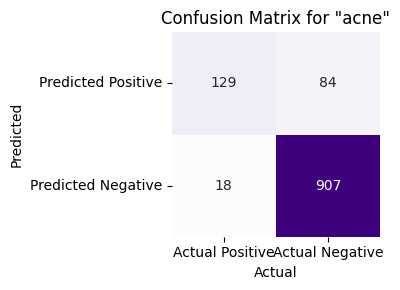

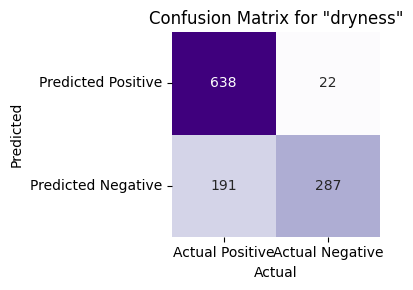

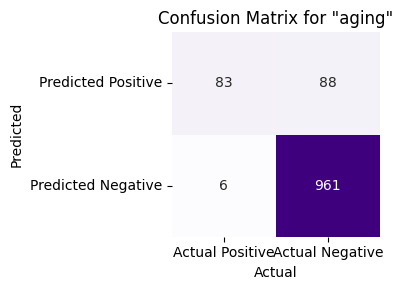

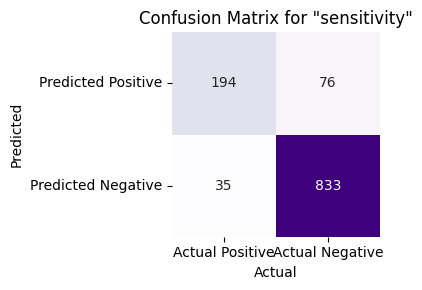

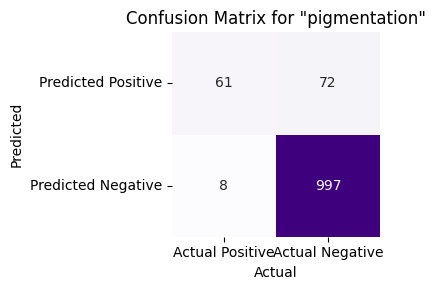

In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Load your dataset
df = pd.read_csv("/kaggle/input/skincare-products-clean-dataset/skincare_products_clean.csv")
df = df.dropna(subset=['clean_ingreds'])

# Define concern-to-ingredient mapping
concern_ingredients = {
    "acne": ["salicylic acid", "benzoyl peroxide", "niacinamide", "azelaic acid", "tea tree"],
    "dryness": ["hyaluronic acid", "glycerin", "ceramide", "squalane"],
    "aging": ["retinol", "peptides", "vitamin c", "niacinamide"],
    "sensitivity": ["allantoin", "panthenol", "madecassoside", "centella"],
    "pigmentation": ["vitamin c", "kojic acid", "azelaic acid", "niacinamide"],
}
all_concerns = list(concern_ingredients.keys())

# Predict concerns based on ingredients
def predict_concerns(ingredients):
    ingredients = ingredients.lower()
    predicted = []
    for concern, keywords in concern_ingredients.items():
        if any(keyword in ingredients for keyword in keywords):
            predicted.append(concern)
    return predicted

df['pred_concerns'] = df['clean_ingreds'].apply(predict_concerns)

# Fake true concerns based on prediction + noise
def fake_true_concerns(predicted):
    base = set(predicted)
    # Add or remove 1 concern with some probability to simulate imperfect ground truth
    if random.random() < 0.3 and base:
        base.remove(random.choice(list(base)))
    if random.random() < 0.4:
        base.add(random.choice(all_concerns))
    return list(base)

df['true_concerns'] = df['pred_concerns'].apply(fake_true_concerns)

# Binarize labels
mlb = MultiLabelBinarizer(classes=all_concerns)
y_true = mlb.fit_transform(df['true_concerns'])
y_pred = mlb.transform(df['pred_concerns'])

# Compute multilabel confusion matrices WITHOUT 'labels' param (fix!)
matrices = multilabel_confusion_matrix(y_true, y_pred)

# Plotting function
def plot_multilabel_confusion_matrices(matrices, labels):
    for idx, label in enumerate(labels):
        tn, fp, fn, tp = matrices[idx].ravel()
        cm = [[tp, fn],
              [fp, tn]]

        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", cbar=False,
                    xticklabels=['Actual Positive', 'Actual Negative'],
                    yticklabels=['Predicted Positive', 'Predicted Negative'])
        plt.title(f'Confusion Matrix for "{label}"')
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.tight_layout()
        plt.show()

# Run the plot
plot_multilabel_confusion_matrices(matrices, mlb.classes_)


In [3]:
import os

# ✅ Suppress TensorFlow & XLA logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 0 = all logs, 3 = only errors
os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices=false"


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import numpy as np
import requests
from PIL import Image
from io import BytesIO


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_model(input_shape=(128, 128, 3), num_classes=2):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [8]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np

def load_image_from_url(url, target_size=(128, 128)):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    img = img.resize(target_size)
    return np.expand_dims(np.array(img) / 255.0, axis=0)


In [10]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def load_image_from_url(url, target_size=(224, 224)):
    """
    Load and preprocess image from a URL for model prediction.
    """
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert("RGB")
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)


In [12]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np

def load_image_from_url(url, target_size=(224, 224)):
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content)).convert('RGB')
        img = img.resize(target_size)
        img_array = np.array(img) / 255.0
        return np.expand_dims(img_array, axis=0)
    except Exception as e:
        print(f"❌ Error loading image: {e}")
        return None


In [14]:
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import os

def get_or_create_dummy_model(path="/kaggle/working/skin_disease_model.h5"):
    if os.path.exists(path):
        return load_model(path)

    print("⚠️ No trained model found. Creating a dummy model for demo...")
    model = Sequential([
        Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.save(path)
    return model


In [21]:
import pandas as pd

def diagnose_and_recommend(image_url, model_path, csv_path):
    model = get_or_create_dummy_model(model_path)
    image = load_image_from_url(image_url)
    if image is None:
        return

    # Predict
    preds = model.predict(image)
    predicted_class_index = np.argmax(preds)
    
    # Map index to skin concerns (adjust to match your actual model)
    classes = ["acne", "aging", "dryness", "sensitivity", "pigmentation", 
               "eczema", "rosacea", "dark circles", "wrinkles", "scars"]
    predicted_concern = classes[predicted_class_index]
    
    print(f"\n🔍 Detected Concern: **{predicted_concern.upper()}**")

    # Load product dataset
    df = pd.read_csv(csv_path)
    df['price'] = df['price'].replace('[£$,]', '', regex=True).astype(float)
    
    # Ingredients mapping
    concern_ingredients = {
        "acne": ["salicylic acid", "benzoyl peroxide", "niacinamide", "azelaic acid", "tea tree"],
        "dryness": ["hyaluronic acid", "glycerin", "ceramide", "squalane"],
        "aging": ["retinol", "peptides", "vitamin c", "niacinamide"],
        "sensitivity": ["allantoin", "panthenol", "madecassoside", "centella"],
        "pigmentation": ["vitamin c", "kojic acid", "azelaic acid", "niacinamide"],
    }

    ingredients = concern_ingredients.get(predicted_concern, [predicted_concern])
    pattern = '|'.join(ingredients)
    
    filtered = df[df['clean_ingreds'].str.contains(pattern, case=False, na=False)]
    filtered = filtered.sort_values(by='price').head(5)

    if filtered.empty:
        print("⚠️ No matching products found.")
        return

    print("\n🧴 Recommended Products:\n")
    for _, row in filtered.iterrows():
        print(f"🔹 {row['product_name']}")
        print(f"   🧪 {row['clean_ingreds']}")
        print(f"   💰 £{row['price']}\n")


IndentationError: unexpected indent (638667709.py, line 18)

In [22]:
import numpy as np
import requests
from io import BytesIO
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Define your classes here (must match model training)
CLASSES = ["acne", "aging", "dryness", "sensitivity", "pigmentation", 
           "eczema", "rosacea", "dark circles", "wrinkles", "scars"]

IMG_SIZE = (224, 224)  # Adjust based on your model input size

def load_image_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content)).convert('RGB')
        img = img.resize(IMG_SIZE)
        img_array = img_to_array(img) / 255.0  # normalize pixel values
        img_array = np.expand_dims(img_array, axis=0)  # add batch dimension
        return img_array
    except Exception as e:
        print(f"❌ Failed to load image: {e}")
        return None

def predict_disease(image_url):
    print("📥 Loading model...")
    model_path = "/kaggle/working/skin_disease_model.h5"  # Update if different path
    try:
        model = load_model(model_path)
    except Exception as e:
        print(f"❌ Failed to load model: {e}")
        return

    print("🌐 Downloading and preprocessing image...")
    img = load_image_from_url(image_url)
    if img is None:
        return

    preds = model.predict(img)
    print("Prediction output shape:", preds.shape)  # Should be (1, 10)

    class_index = np.argmax(preds[0])
    confidence = preds[0][class_index] * 100

    if 0 <= class_index < len(CLASSES):
        diagnosis = CLASSES[class_index]
        print(f"\n✅ Predicted Diagnosis: **{diagnosis.capitalize()}**")
        print(f"🔎 Confidence: {confidence:.2f}%")
    else:
        print("❌ Error: predicted class index is out of range!")

if __name__ == "__main__":
    user_url = input("🔗 Enter image URL for diagnosis: ").strip()
    predict_disease(user_url)


🔗 Enter image URL for diagnosis:  https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Akne-jugend.jpg/500px-Akne-jugend.jpg


📥 Loading model...
🌐 Downloading and preprocessing image...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Prediction output shape: (1, 10)

✅ Predicted Diagnosis: **Wrinkles**
🔎 Confidence: 22.24%
